# MP01: CS 498 DSG (Spring 2019)


# Task 0 – Getting to know the analysis environment

##  1. Import the data into Jupyter Notebook.

In [1]:
# import the required libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats


In [2]:
# import the datasets
diseng = pd.read_csv('mp1_av_disengagements.csv',sep=',') # disengagements
t_miles = pd.read_csv('mp1_av_totalmiles.csv',sep=',')    # total miles

In [3]:
diseng['Month']=pd.to_datetime(diseng['Month'],format='%y-%b')
t_miles['Month']=pd.to_datetime(t_miles['Month'],format='%y-%b')

In [4]:
print(diseng.shape)
diseng.head()

(1024, 7)


,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause
0,2014-09-01,WDD2221851A001072,urban-street,cloudy,automatic,0.58,Incorrect Traffic Light Detection
1,2014-09-01,WDD2221851A001072,urban-street,cloudy,automatic,0.66,Adverse road surface conditions
2,2014-09-01,WDD2221851A001072,urban-street,cloudy,automatic,1.93,Position Estimation Failure
3,2014-09-01,WDD2221851A001072,urban-street,cloudy,automatic,0.65,Emergency Vehicle
4,2014-09-01,WDD2221851A001072,urban-street,cloudy,automatic,0.64,Adverse road surface conditions


In [5]:
print(t_miles.shape)
t_miles

(17, 6)


,Month,Car,miles driven in autonomous mode,total number of disengagements,number of automatic disengagements,number of manual disengagements
0,2014-09-01,WDD2221851A001072,4207,44,24,20
1,2014-10-01,WDD2221851A001072,23971,228,100,128
2,2014-11-01,WDD2221851A001072,15837,141,66,75
3,2014-12-01,WDD2221851A001072,9413,36,15,21
4,2015-01-01,WDD2221851A001072,18192,48,18,30
5,2015-02-01,WDD2221851A001072,18745,16,8,8
6,2015-03-01,WDD2221851A001072,22204,39,31,8
7,2015-04-01,WDD2221851A001072,31927,72,51,21
8,2015-05-01,WDD2221851A001072,38017,34,11,23
9,2015-06-01,WDD2221851A001072,42047,127,58,69


##  2. Summarize the following information

### a. Total number of AV disengagements over the entire duration of available data

In [6]:
print(t_miles['total number of disengagements'].sum())

1024


### b. Number of unique months that have recorded AV disengagements

In [7]:
unique_months = t_miles['Month'].unique()
print(len(unique_months))

15


### c. List of unique locations of AV disengagements

In [8]:
unique_locations = diseng['Location'].unique()
print(unique_locations)

['urban-street' 'highway']


### d. Number of unique causes for AV disengagements

In [9]:
unique_cause= diseng['Cause'].unique()
print(len(unique_cause))

10


### e. Number of missing values (NAs commonly occur in real world datasets)

In [10]:
diseng['ReactionTime'].isnull().sum()

532

## 3. Plot a pie chart for the causes of AV disengagement. Based on the pie-chart, list the top 2 leading causes of disengagement?

Text(0.5, 1.0, 'Causes of Disengagement')

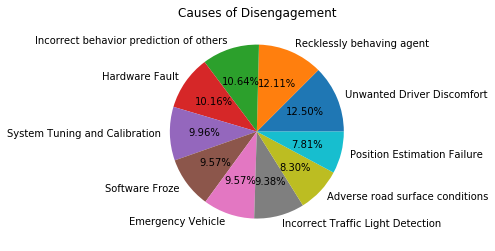

In [11]:
# series =pd.Series(diseng['Cause'].values).value_counts()
# ax = series.plot(kind='pie',title= 'Causes',autopct='%1.2f%%')
# ax.set_ylabel('')
# ax.set_title('Causes of Disengagement')

#pie plot
#get the causes data with index using series
series = pd.Series(diseng['Cause'].value_counts())
#plot pie

ax = series.plot(kind = 'pie',autopct='%1.2f%%')
ax.set_ylabel('') #remove the ylabel
ax.set_title('Causes of Disengagement')

In [12]:
# print("1st leading Cause of Disengagement: {0}\t Perecentage: {1}%".format(series.index[0],100*series[0]/sum(series)))
# print("2nd leading Cause of Disengagement: {0}\t Perecentage: {1}%".format(series.index[1],100*series[1]/sum(series)))

print("2nd leading Cause of Disengagement: {0}\t Percentage: {1}%".format(series[0], 100 * series[0]/sum(series)))
print("2nd leading Cause of Disengagement: {0}\t Percentage: {1}%".format(series[1], 100 * series[1]/sum(series)))

2nd leading Cause of Disengagement: 128	 Percentage: 12.5%
2nd leading Cause of Disengagement: 124	 Percentage: 12.109375%


## 4. Visualize the trend of disengagement/mile over time with monthly granularity. How would you describe the trend? Are AV’s maturing over time?

In [13]:
trend = t_miles.groupby('Month').sum().reset_index()
# reset_index() can generate a default index for the df. Otherwise the month will be the index
trend['disengagement per mile'] = trend['total number of disengagements']/trend['miles driven in autonomous mode']

In [14]:
trend

,Month,miles driven in autonomous mode,total number of disengagements,number of automatic disengagements,number of manual disengagements,disengagement per mile
0,2014-09-01,4207,44,24,20,0.010459
1,2014-10-01,61881,244,111,133,0.003943
2,2014-11-01,58824,189,85,104,0.003213
3,2014-12-01,9413,36,15,21,0.003824
4,2015-01-01,18192,48,18,30,0.002639
5,2015-02-01,18745,16,8,8,0.000854
6,2015-03-01,22204,39,31,8,0.001756
7,2015-04-01,31927,72,51,21,0.002255
8,2015-05-01,38017,34,11,23,0.000894
9,2015-06-01,42047,127,58,69,0.003020


Text(0, 0.5, 'disengagement per mile')

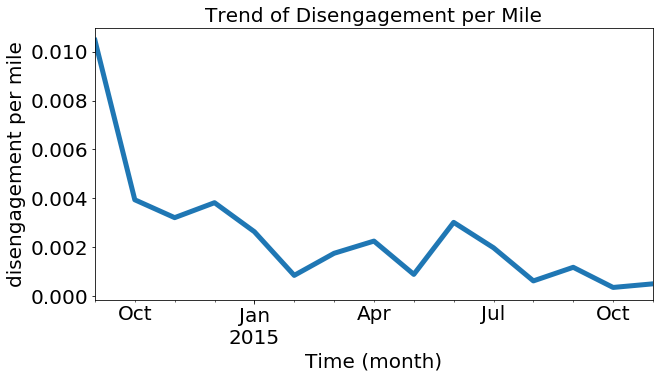

In [15]:
# ax = trend.plot(x='Month',y='disengagement per mile',figsize=(10,5), linewidth=5, fontsize=20,legend=False)
# ax.set_title('Trend of Disengagement per Mile', fontsize=20)
# ax.set_xlabel('Time (month)', fontsize=20)
# ax.set_ylabel('disengagement per mile', fontsize=20)

ax = trend.plot(x= "Month", y="disengagement per mile", figsize=(10,5), linewidth=5, fontsize=20,legend=False)
ax.set_title('Trend of Disengagement per Mile', fontsize=20)
ax.set_xlabel('Time (month)', fontsize=20)
ax.set_ylabel('disengagement per mile', fontsize=20)

It can be seen that there is a decreasing trend in disengagements per mile. That means that autonomous vehicles are improving with time.

# Task 1 – Basic Analysis of AV Disengagements

## 1. What do the following distributions signify about samples drawn from it

### a. Gaussian distribution

Central Limit theorem

Let $X_1,X_2,...,X_n$ be i.i.d. random variables with expected value $E(X_i)= \mu$ and variance$ 0<Var(X_i)= \sigma^2<\infty$. Then, the random variable
$Z_n= \frac{\bar{X} -\mu}{\sigma/ \sqrt{n}}= \frac{X_1+X_2+...+X_n -n\mu} {n \sqrt{σ}}$
converges in distribution to the standard normal random variable as $n$ goes to infinity

The Gaussian distribution is useful because of the central limit theorem which establishes that, in some situations, when independent random variables are added, their properly normalized sum tends toward a normal distribution regardless of the underlying distribution of the original random variables. So, if we have a sample drawn from a Gaussian distribution, it siginifies that the random variable itself may be a sum of identically distributed independent random variables with some distributions.

PDF: ${\displaystyle f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}}$

### b. Exponential distribution

The exponential distribution (also known as the negative exponential distribution) is the probability distribution that describes the time between events in a Poisson process, that is, a process in which events occur continuously and independently at a constant average rate. Also, exponential distribution exhibits the memorlyess property, i.e., $\Pr(X> m+n \mid X \geq m) = \Pr(X > n)$

PDF: $ f(x;\lambda) = \begin{cases}
\lambda e^{-\lambda x} & x \ge 0, \\
0 & x < 0.
\end{cases}$

### c. Weibull distribution

The probability density function of a Weibull random variable is:
$
{\displaystyle f(x;\lambda ,k)={\begin{cases}{\frac {k}{\lambda }}\left({\frac {x}{\lambda }}\right)^{k-1}e^{-(x/\lambda )^{k}}&x\geq 0,\\0&x<0,\end{cases}}}$

where k > 0 is the shape parameter and $\lambda$ > 0 is the scale parameter of the distribution. Its complementary cumulative distribution function is a stretched exponential function. The Weibull distribution is related to a number of other probability distributions; in particular, it interpolates between the exponential distribution (k = 1) and the Rayleigh distribution (k = 2 and ${\displaystyle \lambda ={\sqrt {2}}\sigma }).$

## 2.  Plot the probability distribution of reaction times. Does this distribution fit any known distributions (Gaussian, Weibull, Exponential)? What does the fit distribution signify?

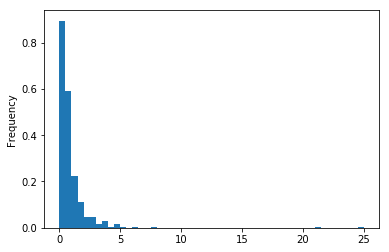

In [16]:
# diseng['ReactionTime'].dropna().plot(kind='hist',bins=50,density=True)
# plt.title('Probability Distribution Plot')
# plt.xlabel('Reaction Time (s)')
# plt.ylabel('Frequency')

diseng['ReactionTime'].dropna().plot(kind = 'hist',bins = 50, density = True)
# plt.title('Probability Distribution Plot')
# plt.xlabel('Reaction Time (s)')
# plt.ylabel('Frequency')
#remember to drop na

In [17]:
# reference:
# https://stackoverflow.com/questions/37487830/how-to-find-probability-distribution-and-parameters-for-real-data-python-3
import scipy.stats as st

def get_best_distribution(data,dist_names):
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        # fit the distribution and get parameters
        param = dist.fit(data)
        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))#lambda here

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

In [18]:
reaction = diseng['ReactionTime'].dropna().values
dist_names = ['norm','expon','exponweib','gamma']
best_dist, best_p, params=get_best_distribution(reaction,dist_names)

p value for norm = 1.7795371657699897e-37
p value for expon = 2.9315375752638033e-05
p value for exponweib = 0.5797693796632604
p value for gamma = 0.0
Best fitting distribution: exponweib
Best p value: 0.5797693796632604
Parameters for the best fit: (62.13448003707407, 0.304116246270133, -0.09454998901334455, 0.00459917324040706)


Text(0, 0.5, 'Frequency')

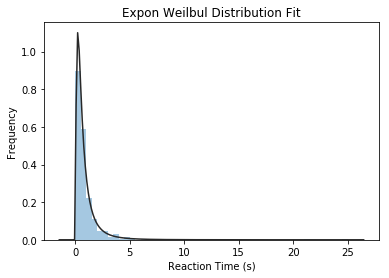

In [19]:
sns.distplot(reaction,fit=stats.exponweib,kde=False)
plt.title('Expon Weilbul Distribution Fit')
plt.xlabel('Reaction Time (s)')
plt.ylabel('Frequency')

The reaction time has a weibul distribution which signifies that the probability of reaction time of a human being high is low.

## 3. Compute the average reaction time

### a. For the entire duration of the dataset

In [20]:
avg_reaction_time = diseng['ReactionTime'].mean()
print(avg_reaction_time)

0.9297703252032526


### b. For the entire duration of the dataset differentiated by the location of disengagement

In [21]:
avg_reaction_time = diseng.groupby(diseng['Location']).mean()
print(avg_reaction_time)

              ReactionTime
Location                  
highway            1.48000
urban-street       0.92865


## 4. It is known that the mean reaction time for humans in non-AV cars is 1.09 seconds [4]. Is the mean reaction time for humans in AV cars different from non-AV cars? Perform a hypothesis test at a 0.05 significance level.

In [22]:
# this is how you run a t-test
reaction_time = list(diseng[diseng['ReactionTime'].notnull()]['ReactionTime'])
one_sample = st.ttest_1samp(reaction_time, 1.09)
print("The t-statistic is %.3f and the p-value is %.3f." % one_sample)

if one_sample[1] < 0.05:
    print("The mean reaction time for humans in AV cars is different from non-AV cars.")
else:
    print("The mean reaction time for humans in AV cars is not different from non-AV cars.")

The t-statistic is -2.099 and the p-value is 0.036.
The mean reaction time for humans in AV cars is different from non-AV cars.


In [23]:
#also works
reaction_time = list(diseng['ReactionTime'].dropna())
one_sample = st.ttest_1samp(reaction_time, 1.09)
one_sample
#print("The t-statistic is %.3f and the p-value is %.3f." % one_sample)
#then compare the p-value to the significant level

Ttest_1sampResult(statistic=-2.0986037086235854, pvalue=0.03636206696694606)

## 5. Plot the probability distribution of disengagements/mile with monthly granularity. Does this distribution fit any known distributions (Gaussian, Weibull, Exponential)? What does the fit distribution signify?

Text(0.5, 1.0, 'disengagement per mile')

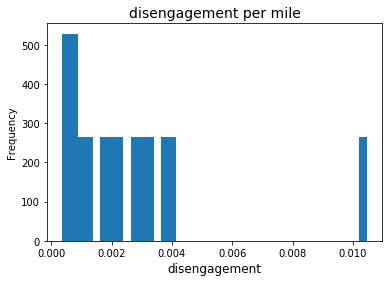

In [24]:
trend['disengagement per mile'].plot(kind='hist',bins=40,density=True)
plt.xlabel('disengagement', fontsize=12)
plt.ylabel('Frequency')
plt.title('disengagement per mile', fontsize=14)

In [25]:
diseng_mile = trend['disengagement per mile']
best_dist, best_p, params=get_best_distribution(diseng_mile,dist_names)

p value for norm = 0.4715442969748681
p value for expon = 0.9806696005068393
p value for exponweib = 0.0027869462809533047
p value for gamma = 0.2176742502678512
Best fitting distribution: expon
Best p value: 0.9806696005068393
Parameters for the best fit: (0.0003605973188528763, 0.0021407886857360853)


C:\Users\yutin\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1469: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


In [26]:
trend['disengagement per mile'].values

array([0.01045876, 0.00394305, 0.00321297, 0.0038245 , 0.00263852,
       0.00085356, 0.00175644, 0.00225514, 0.00089434, 0.00302043,
       0.00198247, 0.00062794, 0.00118369, 0.0003606 , 0.00050836])

Text(0, 0.5, 'Frequency')

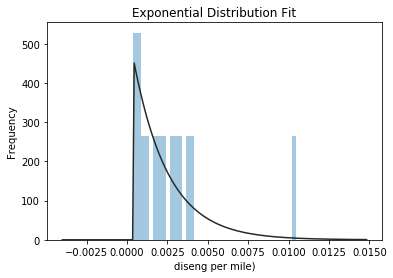

In [27]:
#with a stats.expon fit!!!
sns.distplot(diseng_mile,bins=40,fit=stats.expon,kde=False)
plt.title('Exponential Distribution Fit')
plt.xlabel('diseng per mile)')
plt.ylabel('Frequency')

The fit distribution signifies that the disengagement per mile is exponentially distributed, i.e., the probability of disengagement within one mile decreases as the mile increases.

# Task 2 – Probabilistic Analysis of AV Disengagement

## Question 1

### 1a. 

The assumption on maximum number of disengagements in a mile allows us to treat the occurrence of a disengagement in a mile as a random variable with an **bernoulli distribution**

###1b. Based on the above assumptions, calculate the probability of disengagement per mile on a cloudy day.

We can calculate the probability of disengagement per mile from data by dividing total no of diseng to total no of miles.

$$P(DPM){\rm{  =  }}{{{\rm{Total Number of Diseng}}} \over {{\rm{Total Number of miles}}}}$$

In [28]:
P_dpm = t_miles['total number of disengagements'].sum()/t_miles['miles driven in autonomous mode'].sum()
print("P(DPM): {0}".format(P_dpm))

P(DPM): 0.002026803687040926


The prob of diseng per mile on a cloudy day can be calculated using Bayes Rule.

$$P(DPM|Cloudy) = {{P(Cloudy|DPM)P(DPM)} \over {P(Cloudy)}}$$

Here P(Cloudy|DPM)can be calculated by counting conditional observations from data.


In [29]:
# probability of clear weather is given as 0.72
P_cloudy = 1-0.72
# separate the dataset with cloudy weather
cloudy = diseng['Weather']=='cloudy'#use bool to count 
# calculate probability
P_dpm_cloudy = (sum(cloudy) / len(diseng)) * P_dpm / P_cloudy
print("P(DPM|cloudy): {0}".format(P_dpm_cloudy))

P(DPM|cloudy): 0.00590255677552725


### 1c.  Based on the above assumptions, calculate the probability of disengagement per mile on a clear day.

Similarly we can calculate the probability of diseng on a clear day using Bayes Rule.

$$P(DPM|Clear) = {{P(Clear|DPM)P(DPM)} \over {P(Clear)}}$$


In [30]:
# a day can either be cloudy or clear. so dataset with clear weather will be
clear = ~cloudy
# probability of clear weather is given as 0.72
P_clear = 0.72
# calculate probability of diseng per mile on a clear day using bayes rule.
P_dpm_clear = (sum(clear) / len(diseng)) * P_dpm / P_clear
print("P(DPM|clear): {0}".format(P_dpm_clear))

P(DPM|clear): 0.0005195663748517999


**Note:**  
The probability of disengagement on a clear day is much smaller than the probability of disengagement  on a cloudy day.

### 1d. calculate the probability of an automatic disengagement per mile on a cloudy day


$$P(Automatic,DPM|Cloudy) = \frac{{P(Automatic,DPM,Cloudy)}}{{P(Cloudy)}} = \frac{{P(Automatic,Cloudy|DPM)P(DPM)}}{{P(Cloudy)}}$$

Here P(Automatic,Cloudy|DPM) can be calculated directly from data by counting conditional observations.


In [31]:
# separate the dataset with automatic diseng
automatic = diseng['TypeOfTrigger']=='automatic'
# calculate prob
P_dpm_cloudy_automatic = (sum(cloudy & automatic) / len(diseng)) *  P_dpm / P_cloudy
print("P(Automatic,DPM|Cloudy): {0}".format(P_dpm_cloudy_automatic))

P(Automatic,DPM|Cloudy): 0.0028063653172267287


Similarly calculate the probability of an automatic disengagement per mile on a clear day.

$$P(Automatic,DPM|Clear) = \frac{{P(Automatic,DPM,Clear)}}{{P(Clear)}} = \frac{{P(Automatic,Clear|DPM)P(DPM)}}{{P(Clear)}}$$

In [32]:
P_dpm_clear_automatic = (sum(clear & automatic) / len(diseng)) * P_dpm / P_clear
print("P(Automatic,DPM|Clear): {0}".format(P_dpm_clear_automatic))

P(Automatic,DPM|Clear): 0.00026390673008345393


### 1e. 
How likely is it that in 10000 miles, there are 150 or more disengagements under
cloudy conditions?

**Normal Distribution Approximation**

As the sample size (N = 10000) is much larger so using central limit theorem and law of large numbers, we can approximate the binomial distribution of disengagements in cloudy atmosphere as a normal distribution. The mean and variance for normal distribution can be calculated as follows. 

$$\mu  = Np = 10000 \times P(DPM |Cloudy)$$
$${\sigma ^2} = Np(1 - p) = 10000 \times P(DPM |Cloudy)(1 - P(DPM |Cloudy))$$

So, we would have $$Z_{n} = (X_{n} - \mu)/\sigma$$ as standard normal distribution. We need to calculate: $P(X_{n} \geq 150)$ so we apply the approximation and calculate $P(X_{n}> 150 - 0.5)$ (As we change to continuous normal distribution from discrete binomial )

In [33]:
mean = 10000*P_dpm_cloudy
std = np.sqrt(10000*P_dpm_cloudy*(1-P_dpm_cloudy))
prob = 1-stats.norm(mean, std).cdf(149.5)#get probability from stats.norm
print('Probability of 150 or more disengagements in 10000 miles under cloudy conditions: {0}'.format(prob))

Probability of 150 or more disengagements in 10000 miles under cloudy conditions: 0.0


## Question 2

At the 0.05 significance level, test the following hypothesis: The AV has more
disengagements (automatic and manual) on cloudy days than clear days. Based on the result of the hypothesis test, what can you conclude about the impact of weather conditions on AV safety?

We can use z-test for comparing proportions and test the following hypothesis:


$$\eqalign{& {H_o}:{\text{ Number of disengagement in cloudy}  \leq \text{ Number of disengagement in clear}}  \cr 
  & {H_a}:{\text{Number of disengagement in cloudy} >  \text{Number of disengagement in clear}} \cr} $$

In [34]:
Total_diseng= t_miles['total number of disengagements'].sum()
Total_miles = t_miles['miles driven in autonomous mode'].sum()
#Calculating total miles travelled in clear and cloudy weather using assumption one and three 
Cloudy_miles = P_cloudy*Total_miles
Clear_miles = P_clear*Total_miles
Counts = [cloudy.sum(),(~cloudy).sum()]
print("Disengs on Cloudy: {0} , Disengs on Clear: {1}".format(Counts[0],Counts[1]))

Disengs on Cloudy: 835 , Disengs on Clear: 189


In [35]:
#Z-test example
from statsmodels.stats.proportion import proportions_ztest
stat, pval = proportions_ztest(Counts, [Cloudy_miles, Clear_miles],alternative='larger')
print('p-value: {0}'.format(pval))

p-value: 0.0


The p-value is zero and hence, null hypothesis is rejected. Therefore, AV has more disengagements on cloudy days.

## Question 3

### 3a. What’s the conditional probability that the reaction time is greater than 0.5s given that the weather was cloudy?

Reaction time is only relevant to automatic disengagements, so we considered only the observations with automatic disengagement. 

The required probability can be calculated directly from data by counting conditional observations.

$P(RT>0.5s|Cloudy,Automatic)$ = **Condition: (Weather=Cloudy) & (Automatic = True) & (Reaction Time > 0.5s)**

In [36]:
P_reaction_cloudy = sum(cloudy & automatic & (diseng['ReactionTime']>0.5))/sum(cloudy & automatic)
print("P(Reaction Time > 0.5s | Cloudy): {0}".format(P_reaction_cloudy))

P(Reaction Time > 0.5s | Cloudy): 0.5390428211586902


### 3b. What’s the conditional probability that the reaction time is greater than 0.7s given that the weather was clear?

The required probability can be calculated similarly from data by counting conditional observations.

$P(RT>0.7s|Clear,Automatic)$ = **Condition: (Weather=Clear) & (Automatic = True) & (Reaction Time > 0.7s)**


In [37]:
#example for conditional probability
P_reaction_clear = sum(clear & automatic & (diseng['ReactionTime']>0.7))/sum(clear & automatic)
print("P(Reaction Time > 0.7s | Clear): {0}".format(P_reaction_clear))

P(Reaction Time > 0.7s | Clear): 0.3854166666666667


## Question 4

A study found that an automatic AV disengagement will result in an accident if the human driver is slow in reacting. Following reactions are considered slow: (i) a reaction time greater than 0.5s under cloudy conditions and, (ii) a reaction time greater than 0.7s under clear conditions. Find the probability of an accident per mile involving an AV disengagement.

$$P(acc/mile) = P(RT>0.7s|Clear, DPM)P(DPM|Clear)P(Clear) + P(RT>0.5s|Cloudy, DPM)P(DPM|Cloudy)P(Cloudy))$$

In [38]:
#it is more convenient to store probability
P_reaction = (P_reaction_clear * P_clear * P_dpm_clear_automatic) + (P_reaction_cloudy * (1 - P_clear) * P_dpm_cloudy_automatic)
print("P(acc/mile): {0}".format(P_reaction))

P(acc/mile): 0.0004968044193821021


## Question 5

The probability of a human driver causing a car accident is 2x10-6 . How do AVs compare to human drivers?

In [39]:
P_human = 2e-6
print("P(Car Accident | Human Driver): {0}".format(P_human))
print("P(Car Accident | AV): {0}".format(P_reaction))

#syntax for if, elif, else
if P_reaction > P_human:
    print("The probability of a human driver causing a car accident is smaller than AVs.")
elif P_reaction == P_human:
    print("The probability of a human driver causing a car accident is same as AVs.")
else:
    print("The probability of a human driver causing a car accident is larger than AVs.")

P(Car Accident | Human Driver): 2e-06
P(Car Accident | AV): 0.0004968044193821021
The probability of a human driver causing a car accident is smaller than AVs.


In [40]:
print("Ratio of P(acc|AV) to P(acc/Human): {0}".format(P_reaction/P_human))

Ratio of P(acc|AV) to P(acc/Human): 248.40220969105104


**Conclusion: As the ratio is much larger, we can conclude that currently AVs are not safe for driving. **

# Task 3

## Question 1

<b> INTRODUCING CLASS LABELS COLUMN</b>

In [41]:
# replace the cause values with corresponding class label
#create categorical data
diseng['Class'] = diseng['Cause']
diseng['Class'].replace(['Incorrect behavior prediction of others','Recklessly behaving agent','Unwanted Driver Discomfort'],'Controller',inplace=True)
diseng['Class'].replace(['Adverse road surface conditions','Emergency Vehicle','Position Estimation Failure','Incorrect Traffic Light Detection'],'Perception System',inplace=True)
diseng['Class'].replace(['System Tuning and Calibration','Hardware Fault','Software Froze'],'Computer System',inplace=True)
diseng.head()

,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause,Class
0,2014-09-01,WDD2221851A001072,urban-street,cloudy,automatic,0.58,Incorrect Traffic Light Detection,Perception System
1,2014-09-01,WDD2221851A001072,urban-street,cloudy,automatic,0.66,Adverse road surface conditions,Perception System
2,2014-09-01,WDD2221851A001072,urban-street,cloudy,automatic,1.93,Position Estimation Failure,Perception System
3,2014-09-01,WDD2221851A001072,urban-street,cloudy,automatic,0.65,Emergency Vehicle,Perception System
4,2014-09-01,WDD2221851A001072,urban-street,cloudy,automatic,0.64,Adverse road surface conditions,Perception System


In [49]:
#real smart!!!!!
def get_values(data):
    colname = data.columns
    c_label = data[colname[-1]].unique()
    f_name  = colname[:-1]#all items except the last one(except class)
    # create a dict of categorical values for each feature
    f_values = {}
    for f in f_name:
        f_values[f] = data[f].unique()
        
    return c_label,f_name,f_values


Select only the required columns. Get class labels, feature names and their unique values from selected data. Then convert data to a list of values to be used for trianing and prediction.

In [52]:
# get label names, feature names and their corresponding values

c_label,f_name,f_values = get_values(diseng[['Location','Weather','TypeOfTrigger','Class']])

data = diseng[['Location','Weather','TypeOfTrigger','Class']].values

f_name

Index(['Location', 'Weather', 'TypeOfTrigger'], dtype='object')

## Question 2
<b> Randomly Split the Data into train set (80%) and test set (20%) </b>

In [0]:
# function that splits dataset into train and test data
def split(data,train_ratio):
    k = int(len(data) * train_ratio)
    # randomly shuffle the dataset
    np.random.shuffle(data)
    train, test = data[:k,:], data[k:,:]
    return train, test

In [0]:
train, test = split(data,0.8)
print("Size of Train Data: {0}".format(len(train)))
print("Size of Test Data: {0}".format(len(test)))

Size of Train Data: 819
Size of Test Data: 205


## Question 3

<b> TRAINING </b>

Train a Naive Bayes model on the training data. The outputs are values of individual class probabilities and the conditional probabilities of categorical values of features

$$p({C_k}) = \frac{{No.{\text{ }}of{\text{ }}diseng{\text{ }}with{\text{ }}{C_k}}}{{Total{\text{ }}No.{\text{ }}of{\text{ }}diseng}}$$

$$p({x_i}|{C_k}) = \frac{{No.{\text{ }}of{\text{ }}{x_i}{\text{ }}in{\text{ }}{C_k}}}{{Total{\text{ }}No.{\text{ }}of{\text{ }}diseng{\text{ }}with{\text{ }}{C_k}}}$$

In [0]:
# function accepts the data values in the form of a list.

def train_NB(data,c_label,f_name,f_values):
    
    c_prob = {}
    f_prob = {}
    N = len(data)
    for label in c_label:
        # separate data values for class label
        separated   = data[data[:,-1]==label]
        Ns = len(separated)
        # calculate class probability
        c_prob[label] = Ns/N
        temp2 = {}
        for i, f in enumerate(f_name): # repeate the procedure for each feature
            # create a temporary dictionary
            temp1 = {}
            for val in f_values[f]:
                # calculate conditional probability
                #temp1[val] = sum(separated[f]==val)/Ns
                temp1[val] = round(sum(separated[:,i]==val)/Ns,4)  
            temp2[f]=temp1
        f_prob[label]=temp2
    # return a dict containing individual class probabilities
    # return a dict containing conditional probabilities of each categorical value
    return c_prob,f_prob

**Class Probabilities P(C_k)**


In [0]:
c_prob,f_prob = train_NB(train,c_label,f_name,f_values)
c_prob

{'Computer System': 0.2979242979242979,
 'Controller': 0.3443223443223443,
 'Perception System': 0.35775335775335776}

**Categorical Feature Probabilities P(x_i|C_k)**

In [0]:
pd.DataFrame(f_prob)

,Computer System,Controller,Perception System
Location,"{'urban-street': 0.9508, 'highway': 0.0492}","{'urban-street': 1.0, 'highway': 0.0}","{'urban-street': 1.0, 'highway': 0.0}"
TypeOfTrigger,"{'automatic': 0.4918, 'manual': 0.5082}","{'automatic': 0.1277, 'manual': 0.8723}","{'automatic': 0.8396, 'manual': 0.1604}"
Weather,"{'cloudy': 0.3811, 'clear': 0.6189}","{'cloudy': 1.0, 'clear': 0.0}","{'cloudy': 1.0, 'clear': 0.0}"


## Question 4

<b> TESTING </b>

Now test the trained model on test data. Predict the class with maximum conditional probability

Assumption: $$p({x_i}|{x_{i + 1}},{x_{i + 2}},..,{x_n},{C_k}) = p({x_i}|{C_k})$$

$${C^*} = \mathop {\arg \max }\limits_{k \in \{ 1,...,K\} } p({C_k})\prod\limits_{i = 1}^n {p({x_i}|{C_k})} $$

In [0]:
def NB_pred(data,c_prob,f_prob,c_label,f_name,f_values):
    pred = []
    for row in data:  
        score = {}
        # calculate conditional probability for each class
        for c in c_label:
            CP = 1
            # calculate probability using Bayes Rule assuming that features are independent
            for i,f in enumerate(f_name):
                CP = CP*f_prob[c][f][row[i]]
            score[c]= CP*c_prob[c]
        # use MAP rule to get class label
        # select the class with maximum probability
        pred.append(max(score, key=score.get))
    return pred

<b> FUNCTION FOR CALCULATING ACCURACY </b>

In [0]:
# function that calculates accuracy of a model given the predictions
def get_accuracy(true,pred):
    accuracy = round(sum(true==pred)/len(true),4)
    return accuracy

In [0]:
pred = NB_pred(test,c_prob,f_prob,c_label,f_name,f_values)
accuracy = get_accuracy(test[:,-1], pred)
print("Accuracy: {0}".format(accuracy))

Accuracy: 0.7854


## Question 5
<b> CROSS-VALIDATION </b>

In [0]:
accuracy = []
for i in range(10):
    train, test = split(data, train_ratio=0.8)
    c_prob,f_prob = train_NB(train,c_label,f_name,f_values)
    pred = NB_pred(test,c_prob,f_prob,c_label,f_name,f_values)
    acc = get_accuracy(test[:,-1], pred)
    accuracy.append(acc)
avg_acc = round(np.mean(accuracy),4)
print("Accuracy List: {0}".format(accuracy))
print("Average Accuracy: {0}".format(avg_acc))

Accuracy List: [0.8, 0.8049, 0.8293, 0.7951, 0.7902, 0.7805, 0.7805, 0.8098, 0.7463, 0.8]
Average Accuracy: 0.7937


## Question 6
<b> PERFORMANCE OF THE MODEL </b>

$P(Chance) = P(Choose \  Class \ 1|Class\  1) + P(Choose \  Class\ 2|Class\ 2) + P(Choose \ Class\ 3|Class\ 3)$

$P(Choose \  Class \ i) = \text{ Number of instance of class i in training data}/ \text{ Total number of Observations in training data}$

$P(Class \ i) = \text{ Number of instance of class i in testing data}/ \text{ Total number of Observations in testing data}$

$P(Choose \  Class \ i|Class\  i) = P(Choose \  Class \ i) \times P(Class \ i)$ ( They are Independent)

In [0]:
_, counts_train = np.unique(train[:,-1],return_counts=True)
train_probs = counts_train/len(train[:,-1])
print('train probabilities classes:',train_probs)
vals, counts_test = np.unique(test[:,-1],return_counts=True)
test_class_probs = counts_test/len(test[:,-1])
print('test probabilities for classes:',test_class_probs)

Guess_right = sum(train_probs*test_class_probs)
print('The accuracy for guessing is:',(Guess_right))

print('Hence Algorithm is doing better than chance')

train probabilities classes: [0.2967033  0.35531136 0.34798535]
test probabilities for classes: [0.29756098 0.34146341 0.36097561]
The probabilities for guessing are: 0.3352273742517645
Hence Algorithm is doing better than chance


## Question 7

Assumption: $$p({x_i}|{x_{i + 1}},{x_{i + 2}},..,{x_n},{C_k}) = p({x_i}|{C_k})$$

The assumption of the model is class conditional independence
The assumptions seem to be reasonable as given a class of disengagement, the location: Highway or Street, Weather: Cloudy or Clear and Type of Trigger: Automatic or Manual, seem to be reasonable

*Testing the assumption for all classes:*

In [0]:
#Dividing data into classes
data = diseng[['Location','Weather','TypeOfTrigger','Class']]
Percept = data.loc[data['Class'] =='Perception System']
Controll = data.loc[data['Class'] == 'Controller']
ComputerSystem = data.loc[data['Class'] == 'Computer System']

<b> For Controller <b>

Testing Independece of Weather and Type of Trigger

In [0]:
Num_manual_Cloudy = ((Controll['Weather']== 'cloudy') & (Controll['TypeOfTrigger'] == 'manual')).sum()
Num_auto_Cloudy = ((Controll['Weather']== 'cloudy') & (Controll['TypeOfTrigger'] == 'automatic')).sum()
Num_manual_Clear = ((Controll['Weather']== 'clear') & (Controll['TypeOfTrigger'] == 'manual')).sum()
Num_auto_Clear = ((Controll['Weather']== 'clear') & (Controll['TypeOfTrigger'] == 'automatic')).sum()

Table = pd.DataFrame(data = {'Clear': [Num_manual_Clear, Num_auto_Clear], 'Cloudy': [Num_manual_Cloudy, Num_auto_Cloudy]}, index = ['Manual', 'Auto'])
Table
chi2, p, dof, expected = stats.chi2_contingency(Table)
print('As p-val is',p,'null hypothesis is not rejected and these are independent')

As p-val is 0.27903314254026157 null hypothesis is not rejected and these are independent


Testing Independece of Location and Type of Trigger

In [0]:
Num_manual_urbanstreet = ((Controll['Location'] == 'urban-street') & (Controll['TypeOfTrigger'] == 'manual')).sum()
Num_auto_urbanstreet = ((Controll['Location']== 'urban-street') & (Controll['TypeOfTrigger'] == 'automatic')).sum()
Num_manual_highway= ((Controll['Location']== 'highway') & (Controll['TypeOfTrigger'] == 'manual')).sum()
Num_auto_highway = ((Controll['Location']== 'highway') & (Controll['TypeOfTrigger'] == 'automatic')).sum()

Table = pd.DataFrame(data = {'urban-street': [Num_manual_urbanstreet, Num_auto_urbanstreet], 'highway': [Num_manual_highway, Num_auto_highway]}, index = ['Manual', 'Auto'])
print(Table)
#chi2, p, dof, expected = stats.chi2_contingency(Table)
print('Data not available for one column, chi-square test cannot be applied')

        highway  urban-street
Manual        0           313
Auto          0            48
Data not available for one column, chi-square test cannot be applied


For the class : <b> Computer System </b>

Testing Independence of Location and Type of Trigger

In [0]:
Num_manual_urbanstreet = ((ComputerSystem['Location'] == 'urban-street') & (ComputerSystem['TypeOfTrigger'] == 'manual')).sum()
Num_auto_urbanstreet = ((ComputerSystem['Location']== 'urban-street') & (ComputerSystem['TypeOfTrigger'] == 'automatic')).sum()
Num_manual_highway= ((ComputerSystem['Location']== 'highway') & (ComputerSystem['TypeOfTrigger'] == 'manual')).sum()
Num_auto_highway = ((ComputerSystem['Location']== 'highway') & (ComputerSystem['TypeOfTrigger'] == 'automatic')).sum()

Table = pd.DataFrame(data = {'urban-street': [Num_manual_urbanstreet, Num_auto_urbanstreet], 'highway': [Num_manual_highway, Num_auto_highway]}, index = ['Manual', 'Auto'])
print(Table)
chi2, p, dof, expected = stats.chi2_contingency(Table)
print('As p-val is',p,'which is low, hence the two variables are not independent')

        highway  urban-street
Manual       19           138
Auto          1           146
As p-val is 0.0001551155946845226 which is low, hence the two variables are not independent


Therefore, the assumption that Location and Type of Trigger are class conditionally independent is invalid for the class Computer System. 

## Question 8

As seen above that the class conditional independence is invalid for one case and also cannot be tested for another indicates that the Naive Bayes may not be perfectly accurate for this type of data. Classification accuracy may be improved by using other type of classifiers which do not make such assumption. (example: Logistic Regression)